In [204]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [205]:
aapl_df = pd.DataFrame(yf.download("AAPL", start="2015-03-24", end="2020-03-24"))

aapl_df.dropna()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200
2015-03-25,27.554167,28.322415,27.554167,28.259883,206620800
2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600
2015-03-27,27.525133,27.848958,27.449203,27.819926,158184800
2015-03-30,28.221916,28.228616,27.692629,27.703796,188398800
...,...,...,...,...,...
2020-03-17,61.363815,62.516537,57.854675,60.065481,324056000
2020-03-18,59.861633,60.669755,57.544048,58.187150,300233600


In [206]:
aapl_df['ema_short'] = aapl_df['Close'].ewm(span=5, adjust=False).mean()
aapl_df['ema_long'] = aapl_df['Close'].ewm(span=20, adjust=False).mean()

In [207]:
aapl_df['bullish'] = 0.0
aapl_df['bullish'] = np.where(aapl_df['ema_short'] > aapl_df['ema_long'], 1.0, 0.0)
aapl_df['crossover'] = aapl_df['bullish'].diff()

In [208]:
aapl_df['Signal'] = 0.0
aapl_df.loc[aapl_df['crossover'] == 1, 'Signal'] = 1
aapl_df.loc[aapl_df['crossover'] == -1, 'Signal'] = -1


In [209]:
aapl_df.head(20)

Price,Close,High,Low,Open,Volume,ema_short,ema_long,bullish,crossover,Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200,28.293383,28.293383,0.0,NaN,0.0
2015-03-25,27.554167,28.322415,27.554167,28.259883,206620800,28.046977,28.222981,0.0,0.0,0.0
2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600,27.946729,28.177577,0.0,0.0,0.0
2015-03-27,27.525133,27.848958,27.449203,27.819926,158184800,27.806197,28.115439,0.0,0.0,0.0
2015-03-30,28.221916,28.228616,27.692629,27.703796,188398800,27.944770,28.125580,0.0,0.0,0.0
2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400,27.892735,28.093493,0.0,0.0,0.0
2015-04-01,27.748457,27.942753,27.491630,27.875754,162485600,27.844642,28.060632,0.0,0.0,0.0
2015-04-02,27.987421,28.041019,27.735061,27.922656,128880400,27.892235,28.053660,0.0,0.0,0.0


AttributeError: 'DataFrame' object has no attribute 'positions'

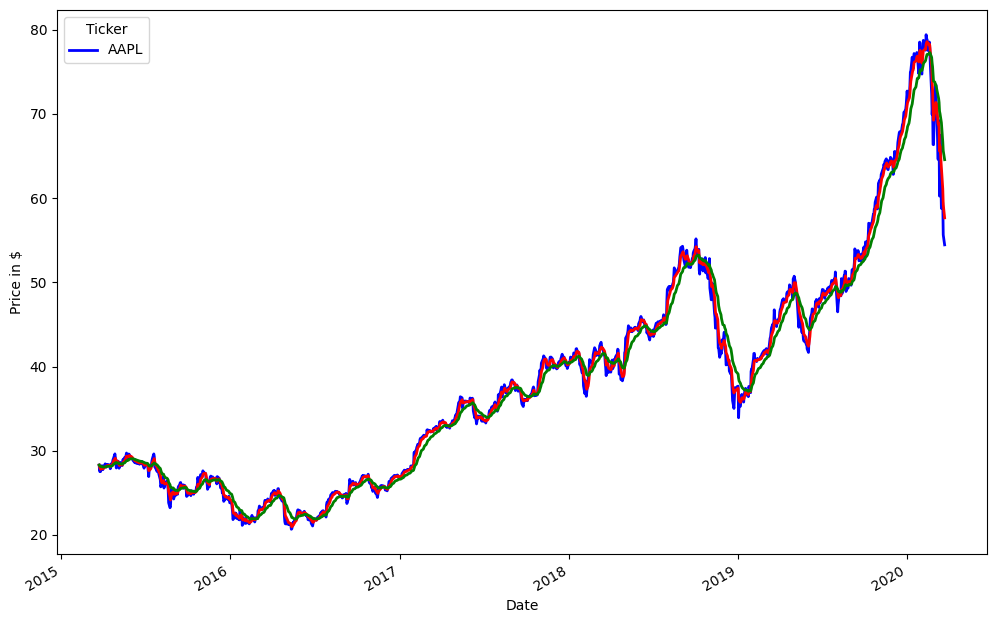

In [210]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')

aapl_df['Close'].plot(ax=ax1, color='b', lw=2.)
aapl_df['ema_short'].plot(ax=ax1, color='r', lw=2.)
aapl_df['ema_long'].plot(ax=ax1, color='g', lw=2.)

ax1.plot(aapl_df.loc[aapl_df.positions == 1.0].index,
         aapl_df.Close[aapl_df.positions == 1.0],
         '^', markersize=10, color='g')
ax1.plot(aapl_df.loc[aapl_df.positions == -1.0].index,
         aapl_df.Close[aapl_df.positions == -1.0],
         'v', markersize=10, color='r')
plt.legend(['Close', 'EMA Short', 'EMA Long', 'Buy', 'Sell'])
plt.title('AAPL EMA Crossover')

In [211]:
aapl_df['daily_return'] = aapl_df['Close'].pct_change().squeeze()
aapl_df.head()

Price,Close,High,Low,Open,Volume,ema_short,ema_long,bullish,crossover,Signal,daily_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200,28.293383,28.293383,0.0,NaN,0.0,NaN
2015-03-25,27.554167,28.322415,27.554167,28.259883,206620800,28.046977,28.222981,0.0,0.0,0.0,-0.026127
2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600,27.946729,28.177577,0.0,0.0,0.0,0.006970
2015-03-27,27.525133,27.848958,27.449203,27.819926,158184800,27.806197,28.115439,0.0,0.0,0.0,-0.007969
2015-03-30,28.221916,28.228616,27.692629,27.703796,188398800,27.944770,28.125580,0.0,0.0,0.0,0.025314


In [212]:
aapl_df['daily_return'] = aapl_df['Close'].pct_change().squeeze()

# Calculate strategy returns by applying the signal from the previous day
aapl_df['strategy_return'] = aapl_df['Signal'] * aapl_df['Close'].pct_change().squeeze()

# Calculate cumulative strategy returns
aapl_df['cumulative_strategy_return'] = (1 + aapl_df['strategy_return']).cumprod()

In [213]:
aapl_df.tail(20)

Price,Close,High,Low,Open,Volume,ema_short,ema_long,bullish,crossover,Signal,daily_return,strategy_return,cumulative_strategy_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2020-02-25,69.910980,73.417696,69.437761,73.034266,230673600,73.784095,76.050131,0.0,0.0,0.0,-0.033872,-0.0,2.659082
2020-02-26,71.020012,72.289226,69.527537,69.534818,198054800,72.862734,75.571072,0.0,0.0,0.0,0.015863,0.0,2.659082
2020-02-27,66.377548,69.406184,66.241649,68.217059,320605600,70.701005,74.695498,0.0,0.0,0.0,-0.065368,-0.0,2.659082
2020-02-28,66.338722,67.564256,62.215609,62.431597,426510000,69.246911,73.899615,0.0,0.0,0.0,-0.000585,-0.0,2.659082
2020-03-02,72.514938,73.153186,67.396837,68.503453,341397200,70.336253,73.767741,0.0,0.0,0.0,0.093101,0.0,2.659082
2020-03-03,70.211899,73.774425,69.357664,73.694344,319475600,70.294802,73.429089,0.0,0.0,0.0,-0.031760,-0.0,2.659082
2020-03-04,73.468643,73.628812,71.136501,71.939768,219178400,71.352749,73.432856,0.0,0.0,0.0,0.046385,0.0,2.659082
2020-03-05,71.085548,72.694504,70.719101,71.716508,187572800,71.263682,73.209303,0.0,0.0,0.0,-0.032437,-0.0,2.659082


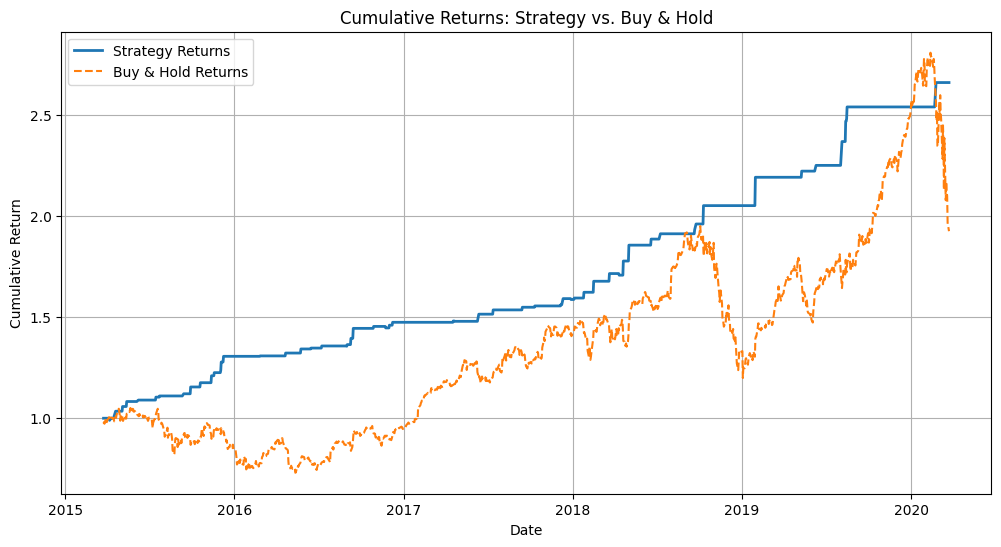

In [214]:
aapl_df['cumulative_buy_hold'] = (1 + aapl_df['daily_return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['cumulative_strategy_return'], label='Strategy Returns', linewidth=2)
plt.plot(aapl_df.index, aapl_df['cumulative_buy_hold'], label='Buy & Hold Returns', linestyle='--')
plt.title('Cumulative Returns: Strategy vs. Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [215]:
rsi_period = 14

aapl_df['Price Changes'] = aapl_df['Close'].diff()
aapl_df['Gain'] = np.where(aapl_df['Price Changes'] > 0, aapl_df['Price Changes'], 0)
aapl_df['Loss'] = np.where(aapl_df['Price Changes'] < 0, -aapl_df['Price Changes'], 0)

aapl_df['AvgGain'] = aapl_df['Gain'].rolling(window=rsi_period).mean()
aapl_df['AvgLoss'] = aapl_df['Loss'].rolling(window=rsi_period).mean()

import math
aapl_df['RS'] = aapl_df['AvgGain'] / (aapl_df['AvgLoss'] + 1 * math.exp(1) - 9)
aapl_df['RSI'] = 100 - (100 / (1 + aapl_df['RS']))
rsi =  aapl_df['RSI'].to_numpy().ravel()


aapl_df['RSISignal'] = 0.0
aapl_df.loc[(aapl_df['crossover'] == 1) & (rsi > 50), 'RSISignal'] = 1
aapl_df.loc[(aapl_df['crossover'] == -1) & (rsi < 50), 'RSISignal'] = -1

In [216]:
aapl_df['RSIstrategy_return'] = aapl_df['RSISignal'] * aapl_df['Close'].pct_change().squeeze()

# Calculate cumulative strategy returns
aapl_df['RSIcumulative_strategy_return'] = (1 + aapl_df['RSIstrategy_return']).cumprod()

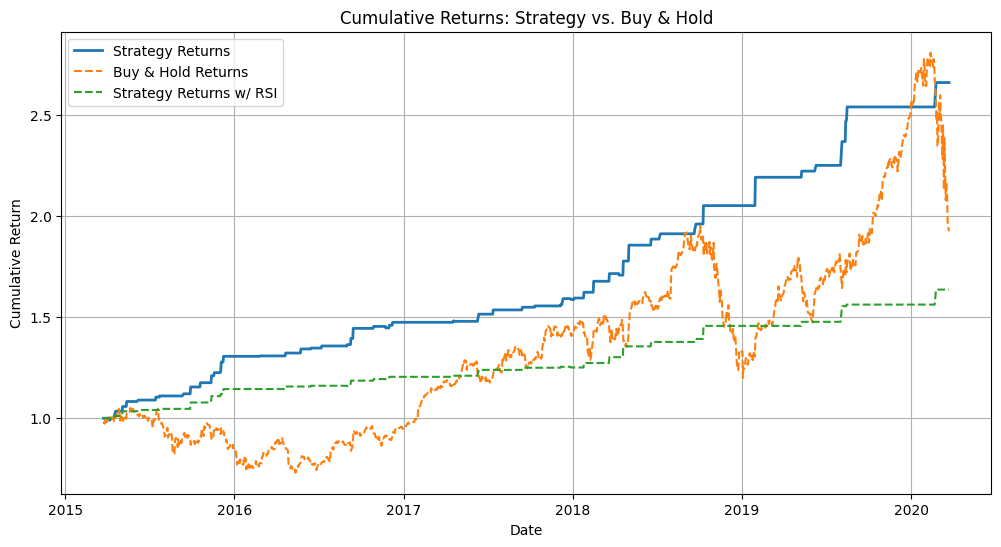

In [217]:

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['cumulative_strategy_return'], label='Strategy Returns', linewidth=2)
plt.plot(aapl_df.index, aapl_df['cumulative_buy_hold'], label='Buy & Hold Returns', linestyle='--')
plt.plot(aapl_df.index, aapl_df['RSIcumulative_strategy_return'], label='Strategy Returns w/ RSI', linestyle='--')

plt.title('Cumulative Returns: Strategy vs. Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [218]:
aapl_df.tail(5)

Price,Close,High,Low,Open,Volume,ema_short,ema_long,bullish,crossover,Signal,...,Price Changes,Gain,Loss,AvgGain,AvgLoss,RS,RSI,RSISignal,RSIstrategy_return,RSIcumulative_strategy_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-17,61.363815,62.516537,57.854675,60.065481,324056000,62.939954,68.244204,0.0,0.0,0.0,...,2.584526,2.584526,0.000000,1.706208,2.395936,-0.439090,-78.281704,0.0,0.0,1.635782
2020-03-18,59.861633,60.669755,57.544048,58.187150,300233600,61.913847,67.445864,0.0,0.0,0.0,...,-1.502182,0.000000,1.502182,1.706208,2.171630,-0.415127,-70.977245,0.0,-0.0,1.635782
2020-03-19,59.402977,61.358970,58.876364,60.036369,271857200,61.076890,66.679875,0.0,0.0,0.0,...,-0.458656,0.000000,0.458656,1.706208,2.201618,-0.418178,-71.873856,0.0,-0.0,1.635782
2020-03-20,55.631737,61.113855,55.330813,59.985395,401693200,59.261839,65.627671,0.0,0.0,0.0,...,-3.771240,0.000000,3.771240,1.265050,2.470992,-0.331971,-49.694048,0.0,-0.0,1.635782
2020-03-23,54.449890,55.452156,51.595986,55.350231,336752800,57.657856,64.563121,0.0,0.0,0.0,...,-1.181847,0.000000,1.181847,1.265050,2.390907,-0.325138,-48.178389,0.0,-0.0,1.635782


Need to look at this more